## Planteamiento del problema de Riesgo de derrumbamiento - Terremotos

Estamos intentando predecir la variable dameage_grade, que representa el nivel de daño del edificio afectado por el terremoto. Hay diferentes grados de daños:
- *1*  representa un daño bajo
- *2*  representa un daño medio
- *3*  representa una destrucción casi completa

El conjunto de datos consiste principalmente en información sobre la estructura de los edificios y su propiedad legal. Cada conjunto de datos representa un edificio afectado por el terremoto de Gorkha.

Hay 39 columnas en este conjunto de datos, donde la columna *building_id* es un identificador único y aleatorio. Las variables categóricas se han ocultado con caracteres minúsculos aleatorios. La aparición del mismo carácter en columnas distintas no implica el mismo valor original.

A continuación, dejo una breve explicación de cada uno de las 38 características:

- ***geo_level_1_id***, ***geo_level_2_id***, ***geo_level_3_id*** : región geográfica en la que existe el edificio, desde la más grande (nivel 1) hasta la subregión más específica (nivel 3). Valores posibles: nivel 1: 0-30, nivel 2: 0-1427, nivel 3: 0-12567.

- ***count_floors_pre_eq***: número de plantas del edificio antes del terremoto.

- ***age*** : edad del edificio en años.

- ***area_percentage*** : área normalizada de la huella del edificio.

- ***altura_porcentaje*** : altura normalizada de la huella del edificio.

- ***land_surface_condition*** : estado de la superficie del terreno donde se construyó el edificio. Valores posibles: n, o, t.

- ***foundation_type*** : tipo de cimentación utilizado durante la construcción. Valores posibles: h, i, r, u, w.

- ***roof_type*** : tipo de tejado utilizado durante la construcción. Valores posibles: n, q, x.

- ***ground_floor_type*** : tipo de la planta baja. Valores posibles: f, m, v, x, z.

- ***other_floor_type*** : tipo de construcciones utilizadas en plantas superiores a la baja (excepto de tejado). Valores posibles: j, q, s, x.

- ***position*** : posición del edificio. Valores posibles: j, o, s, t.

- ***plan_configuration*** : configuración de la planta del edificio. Valores posibles: a, c, d, f, m, n, o, q, s, u.

- ***has_superstructure_adobe_mud*** : variable booleana que indica si la superestructura era de Adobe/Mud.

- ***has_superstructure_mud_mortar_stone*** : variable booleana que indica si la superestructura estaba hecha de Barro-Mortero-Piedra.

- ***has_superstructure_stone_flag*** : variable bandera que indica si la superestructura era de Piedra.

- ***has_superstructure_cement_mortar_stone*** : variable bandera que indica si la superestructura era de Mortero de Cemento - Piedra.

- ***has_superstructure_mud_mortar_brick*** : variable booleana que indica si la superestructura era de Mortero de Barro - Ladrillo.

- ***has_superstructure_cement_mortar_brick*** : variable booleana que indica si la superestructura era de Mortero de Cemento - Ladrillo.

- ***has_superstructure_timber*** : variable booleana que indica si la superestructura es de madera.

- ***has_superstructure_bamboo*** : variable booleana que indica si la superestructura era de Bambú.

- ***has_superstructure_rc_non_engineered*** : variable booleana que indica si la superestructura era de hormigón armado no diseñado.

- ***has_superstructure_rc_engineered*** : variable booleana que indica si la superestructura es de hormigón armado diseñado.

- ***has_superstructure_other*** : variable booleana que indica si la superestructura era de cualquier otro material.

- ***legal_ownership_status*** : estado de propiedad legal del terreno donde se construyó el edificio. Valores posibles: a, r, v, w.

- ***count_families*** : número de familias que viven en el edificio.

- ***has_secondary_use*** : variable booleana que indica si el edificio se utilizó para algún fin secundario.

- ***has_secondary_use_agriculture*** : variable booleana que indica si el edificio se utilizó con fines agrícolas.

- ***has_secondary_use_hotel*** : variable booleana que indica si el edificio se utilizó como hotel.

- ***has_secondary_use_rental*** : variable booleana que indica si el edificio se utilizó con fines de alquiler.

- ***has_secondary_use_institution*** : variable booleana que indica si el edificio se utilizó como sede de alguna institución.

- ***has_secondary_use_school*** : variable booleana que indica si el edificio se utilizó como escuela.

- ***has_secondary_use_industry*** : variable booleana que indica si el edificio se utilizó con fines industriales.

- ***has_secondary_use_health_post*** : variable booleana que indica si el edificio se utilizó como puesto sanitario.

- ***has_secondary_use_gov_office*** : variable booleana que indica si el edificio se utilizó fas una oficina gubernamental.

- ***has_secondary_use_use_police*** : variable booleana que indica si el edificio se utilizó como comisaría de policía.

- ***has_secondary_use_other*** : variable booleana que indica si el edificio se utilizó secundariamente para otros fines.


In [1]:
# Importaciones necesarias
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MaxAbsScaler
import sklearn.neighbors
from scipy import cluster	
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importamos los dos ficheros el train y el test
url1 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/train_values.csv'
dftrain = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/test_values.csv'
dftest = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/train_labels.csv'
dftrain_y = pd.read_csv(url3)

In [3]:
# Vista del dataframe sin modificaciónes
dftrain

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


#### Estudio de los Datos

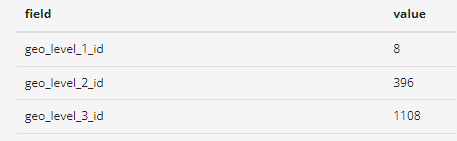

Estuve haciendo una observacion sobre como estaba organizado los tres *geo_level_\*_id* en el mapa de Nepal y hice un pequeño calculo que afirmó lo que pensaba. Mi pensamiendo es que el *geo_level_1_id*,*geo_level_2_id* y *geo_level_3_id* dan la misma información que el anterior pero cado uno es más específico que el siguiente. Cuando utilizando los números de ejemplo que nos proporciona la página, confirmo mis sospechas. En el *geo_level_1_id* 8 hay unos valores únicos del *geo_level_2_id* y *geo_level_3_id*, es decir, que si eliminamos del *geo_level_1_id* = 8 del dataframe y guardamos los otros valores. Buscamos el número 396 en los demás *geo_level_\*_id* no obtendremos ningún resultado. Se lo voy a mostrar a continuación.

In [4]:
ejemplo = dftrain[dftrain['geo_level_1_id'] != 8]
df = ejemplo.loc[ejemplo['geo_level_2_id'] == 396]
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other


Con lo cual mi criterio a la hora de elegir con cuantas filas entrenar lo que voy a hacer es coger el *geo_level_2_id* y coger la media de todas las cantidades. Con eso creo que se reduciría la cantidad de filas considerablemente.

In [5]:
260601 / 1427

182.62158374211631

Lo que voy a hacer ahora es de cada geo_level_2_id coger 182 y aunque este no tenga 182, los cogeré todos.
Al final no pude llegar a un código que me diera lo que necesito. Pero por lo que he hablado con los compañeros lo que voy a hacer es crear tres dataframes cada uno con cada damage_grade y luego reduzco estos en un 40, 20, 40 % para asi tener una cantidad menor pero equitativa de cada uno.

In [6]:
dftrain['damage_grade'] = dftrain_y['damage_grade']
dfDg1 = dftrain[dftrain['damage_grade'] == 1]
dfDg2 = dftrain[dftrain['damage_grade'] == 2]
dfDg3 = dftrain[dftrain['damage_grade'] == 3]

In [7]:
print(len(dfDg1),len(dfDg2),len(dfDg3))

25124 148259 87218


In [8]:
dfDg1 = dfDg1.sample(frac=0.40,random_state=10)
dfDg2 = dfDg2.sample(frac=0.40,random_state=10)
dfDg3 = dfDg3.sample(frac=0.40,random_state=10)

In [9]:
print(len(dfDg1),len(dfDg2),len(dfDg3))

10050 59304 34887


In [10]:
dftrain = pd.concat([dfDg1, dfDg2, dfDg3])

### Tratado de datos

Lo que primeramente se debe hacer, es preparar el dataframe.<br>
En primer lugar, vamos a comprobar que ninguno de los valores sean o tengan valores nulos.

#### Tratamiento del DataFrame dftrain

In [11]:
dftrain.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Como podemos ver ninguno de los datos que hay son nulos, ahora, vamos a pasar los datos de categóricos a numéricos donde haga falta.

In [12]:
#Mostramos que tipo de dato contiene cada columna de dataframe, luego de obtenerlos. Se transforman los datos que hagan falta.
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104241 entries, 225474 to 243387
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             104241 non-null  int64 
 1   geo_level_1_id                          104241 non-null  int64 
 2   geo_level_2_id                          104241 non-null  int64 
 3   geo_level_3_id                          104241 non-null  int64 
 4   count_floors_pre_eq                     104241 non-null  int64 
 5   age                                     104241 non-null  int64 
 6   area_percentage                         104241 non-null  int64 
 7   height_percentage                       104241 non-null  int64 
 8   land_surface_condition                  104241 non-null  object
 9   foundation_type                         104241 non-null  object
 10  roof_type                               104241 non-

Aquí pasamos todos los valores categóricos a numéricos

In [13]:
dftrain['land_surface_condition'] = dftrain['land_surface_condition'].replace({'n': 0, 'o': 1, 't': 2})
dftrain['foundation_type'] = dftrain['foundation_type'].replace({'h': 0, 'i': 1, 'r': 2, 'u': 3, 'w': 4})
dftrain['roof_type'] = dftrain['roof_type'].replace({'n': 0, 'q': 1, 'x': 2})
dftrain['ground_floor_type'] = dftrain['ground_floor_type'].replace({'f': 0, 'm': 1, 'v': 2, 'x': 3, 'z': 4})
dftrain['other_floor_type'] = dftrain['other_floor_type'].replace({'j': 0, 'q': 1, 's': 2, 'x': 3})
dftrain['position'] = dftrain['position'].replace({'j': 0, 'o': 1, 's': 2, 't': 3})
dftrain['plan_configuration'] = dftrain['plan_configuration'].replace({'a': 0, 'c': 1, 'd': 2, 'f': 3, 'm': 4, 'n': 5, 'o': 6, 'q': 7, 's': 8, 'u': 9})
dftrain['legal_ownership_status'] = dftrain['legal_ownership_status'].replace({'a': 0, 'r': 1, 'v': 2, 'w': 3})

Eliminamos todos los campos de *has_secondary_use_\** salvo el mismo *has_secondary_use*.

In [14]:
dftrain.drop(['has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police','has_secondary_use_rental', 'has_secondary_use_other'], axis = 1, inplace = True)

In [15]:
#Volvemos a mostrar la info del dataframe para confirmar que las variables han sido cambiadas de categoricos a numéricos
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104241 entries, 225474 to 243387
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             104241 non-null  int64
 1   geo_level_1_id                          104241 non-null  int64
 2   geo_level_2_id                          104241 non-null  int64
 3   geo_level_3_id                          104241 non-null  int64
 4   count_floors_pre_eq                     104241 non-null  int64
 5   age                                     104241 non-null  int64
 6   area_percentage                         104241 non-null  int64
 7   height_percentage                       104241 non-null  int64
 8   land_surface_condition                  104241 non-null  int64
 9   foundation_type                         104241 non-null  int64
 10  roof_type                               104241 non-null  int64


Creamos un dataframe para las y que en este caso es dftrain_y y luego eliminamos las y del dataframe original que es dftrain.

In [16]:
dftrain_y = dftrain['damage_grade']
dftrain.drop(['damage_grade'],axis=1, inplace=True)

Y aquí lo escalamos

In [17]:
scaler = MaxAbsScaler()
train_scaled = scaler.fit_transform(dftrain)

#### Tratamiento del DataFrame dftest
Tras haber tratado los datos del dftrain se va a realizar el mismo proceso con los valores de dftest

In [18]:
dftest.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [19]:
#Mostramos que tipo de dato contiene cada columna de dataframe, luego de obtenerlos. Se transforman los datos que hagan falta.
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [20]:
dftest['land_surface_condition'] = dftest['land_surface_condition'].replace({'n': 0, 'o': 1, 't': 2})
dftest['foundation_type'] = dftest['foundation_type'].replace({'h': 0, 'i': 1, 'r': 2, 'u': 3, 'w': 4})
dftest['roof_type'] = dftest['roof_type'].replace({'n': 0, 'q': 1, 'x': 2})
dftest['ground_floor_type'] = dftest['ground_floor_type'].replace({'f': 0, 'm': 1, 'v': 2, 'x': 3, 'z': 4})
dftest['other_floor_type'] = dftest['other_floor_type'].replace({'j': 0, 'q': 1, 's': 2, 'x': 3})
dftest['position'] = dftest['position'].replace({'j': 0, 'o': 1, 's': 2, 't': 3})
dftest['plan_configuration'] = dftest['plan_configuration'].replace({'a': 0, 'c': 1, 'd': 2, 'f': 3, 'm': 4, 'n': 5, 'o': 6, 'q': 7, 's': 8, 'u': 9})
dftest['legal_ownership_status'] = dftest['legal_ownership_status'].replace({'a': 0, 'r': 1, 'v': 2, 'w': 3})

In [21]:
dftest.drop(['has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police','has_secondary_use_rental', 'has_secondary_use_other'], axis = 1, inplace = True)

In [22]:
#Volvemos a mostrar la info del dataframe para confirmar que las variables han sido cambiadas de categoricos a numéricos
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             86868 non-null  int64
 1   geo_level_1_id                          86868 non-null  int64
 2   geo_level_2_id                          86868 non-null  int64
 3   geo_level_3_id                          86868 non-null  int64
 4   count_floors_pre_eq                     86868 non-null  int64
 5   age                                     86868 non-null  int64
 6   area_percentage                         86868 non-null  int64
 7   height_percentage                       86868 non-null  int64
 8   land_surface_condition                  86868 non-null  int64
 9   foundation_type                         86868 non-null  int64
 10  roof_type                               86868 non-null  int64
 11  ground_floor_ty

In [23]:
scaler = MaxAbsScaler()
test_scaled = scaler.fit_transform(dftest)

### Matríz de Correlación

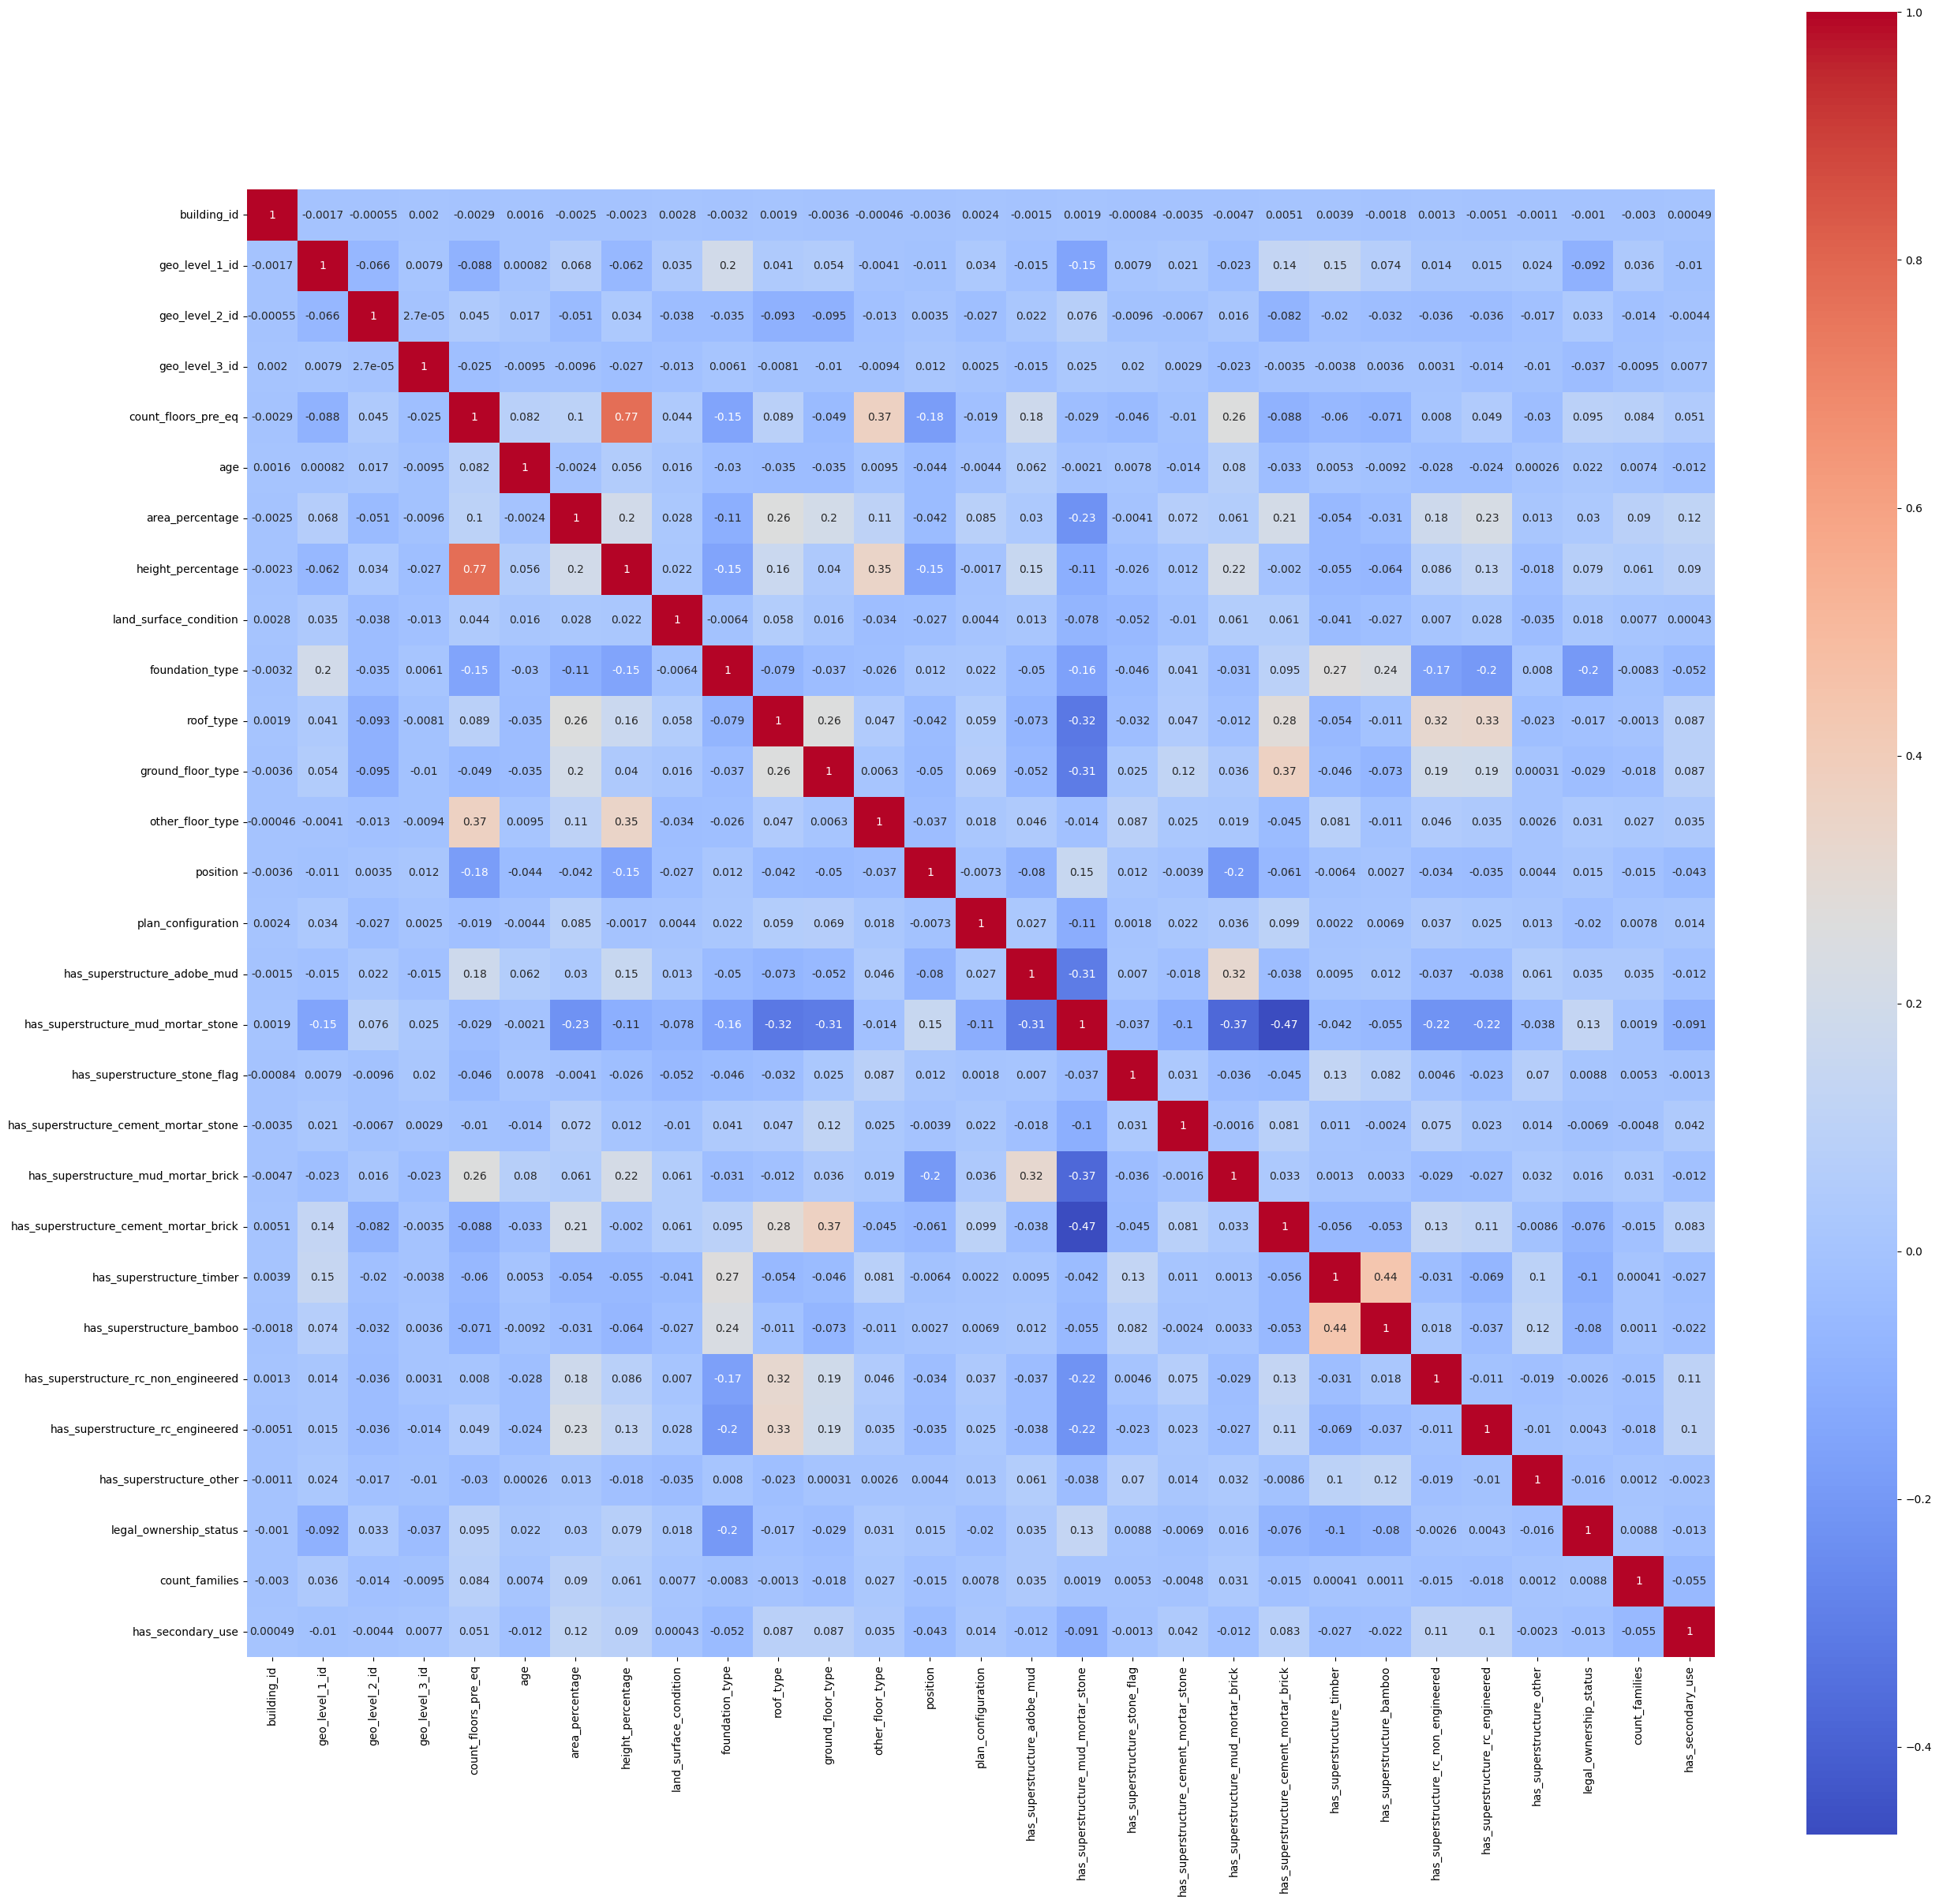

In [24]:
# Crear el heatmap
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dftrain.corr(), cmap='coolwarm', annot=True, square=True)
# Encontré un parámetro  que te lo realiza todo como una huella calorifica, es decir, 
# los que tienen más correlación te los pone en rojo y los que menos te los pone en azul
plt.show()

La matríz de correlación no nos proporciona mucha información ya que dice que todas las columnas entre ellas no tienen mucha correlación, es decir, que la correlación es negativa nula o positiva nula en su mayoría salvo en algunos puntos que esta se salva y aumenta un poco. Hay un punto que da 0.77 de correlación entre dos variables las cuales son: count_floors_pre_eq y height_percentage. Esto se debe a que cuantos más pisos tenga el edificio mayor será la altura.

### Dendograma

In [25]:
df_train_T = train_scaled.T

c:\Users\ruben\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
C:\Users\ruben\AppData\Local\Temp\ipykernel_15976\74092569.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


Distancia Media	 142.88


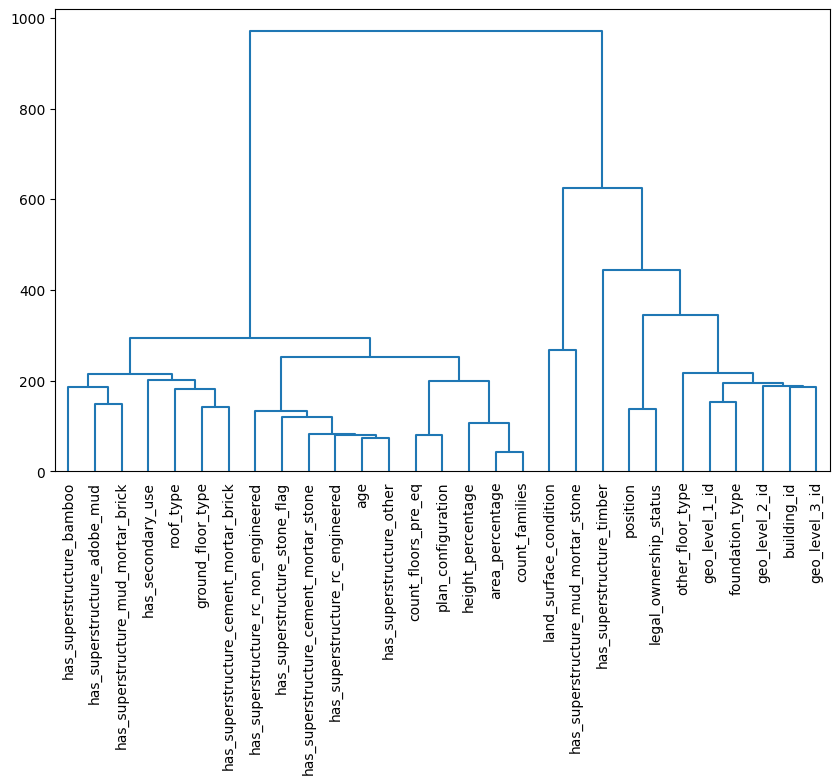

In [26]:
# Para obtener el dendograma con el agrupamiento por características, se hace necesario obtener la transpuesta de la matriz del dataset

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean') 
D = dist.pairwise(df_train_T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma
plt.figure(figsize=(10, 6))
threshold_2 = 7
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=dftrain.columns.to_list(), leaf_rotation=90)
plt.show()

Con el Dendograma podemos sacar un poco más de información de que variables son muy parecidas y por ello podemos eliminar una de ellas o hacer una media si lo creo conveniente.
No lo he comentado anteriormente pero mi objetivo es reducir todo lo posible las columnas del dataframe. Hay dos valores que dependen uno del otro como viene siendo el count_floors_pre_eq y height_percentage. De estos dos me voy a quedar con el height_percentage.

In [27]:
dftrain.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
dftest.drop(['count_floors_pre_eq'], axis = 1, inplace = True)


Al estar colocados de manera ordenada los dataframes que nosotros mismos descargamos de la página, lo unico que vamos a hacer es a la hora de separar los dataframes en X_train, X_test, y_train, y_test es llamar a dataframe dftrain para la X y dftrain_y['damage_grade'] para la y.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dftrain, dftrain_y, test_size=0.25, random_state=42, shuffle=True)

### KNeighborsClassifier

Hiperparametrización para el modelo de KNeighborsClassifier

In [29]:
#Hiperparametrización
param_dist = {
    'n_neighbors': range(1, 70, 5),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    #'leaf_size': (1,2,3,4,5,6,7,8,9,10),
    #'p': [1, 2]
}

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
#Creamos el modelo
knn = KNeighborsClassifier()

#creamos el cross validation para luego añadirselo
tscv = TimeSeriesSplit()

#inicializamos el randomSearchCV y le introdicimos los valores
knn_regres = RandomizedSearchCV(knn, param_dist, cv = tscv, error_score='raise')

# Entrenamos el random search model
knn_regres.fit(X_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   error_score='raise', estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(1, 70, 5),
                                        'weights': ['uniform', 'distance']})

In [31]:
# realizaremos una predición con el mejor modelo obtenido anteriormente
predic = knn_regres.best_estimator_.predict(X_test)

#Evaluaremos el modelo usando el f1_score
score_f1 = f1_score(y_test,predic, average = 'micro', labels=[1,2,3])

print(f'Los mejores parametros para predecir son:{knn_regres.best_estimator_}\nF1_score --> {score_f1}')

Los mejores parametros para predecir son:KNeighborsClassifier(algorithm='ball_tree', n_neighbors=41)
F1_score --> 0.5614136065385058


Matríz de Confusión

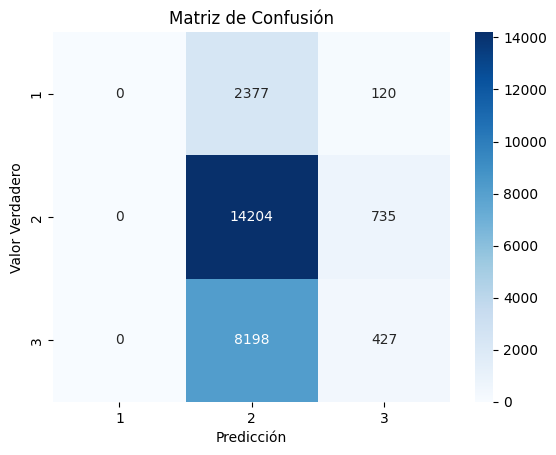

In [32]:
cm = confusion_matrix(y_test, predic)

# Crear la visualización gráfica de la matriz de confusión utilizando Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

In [33]:
# elegimos el mejor resultado
best_random = knn_regres.best_estimator_
# entrenamos y predecimos
best_random.fit( X = dftrain, y = dftrain_y)
y_pred = best_random.predict(dftest)

Descargamos el csv donde vamos a agregar todas las respuestas obtenidas con el predict realizado anteriormente

In [34]:
url4 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/submission_format.csv'
dfsubmission = pd.read_csv(url4)
dfsubmission['damage_grade'] = y_pred

# Obtener la ruta completa a la carpeta de descargas del usuario
desktop_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# Pasar el dataframe a csv y guardar el archivo en la carpeta de descargas
dfsubmission.to_csv(os.path.join(desktop_path, 'submission_KNN.csv'), index=False)

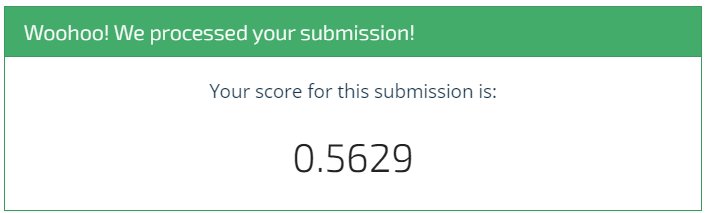

### SVC

Cogemos una partición más pequeña de dftrain para poder entrenar el svc, este en la página oficial de sklearn nos dice que es un modelo que no esta recomendado para una gran cantidad de datos asi que cogeremos una muestra menor.

In [35]:
dfsvc = dftrain

# le insertamos el damage_grade y luego cogemos el 10 porciento de todo el dataframe
dfsvc['damage_grade'] = dftrain_y
dfsvc = dfsvc.sample(frac=0.01,random_state=10)

In [36]:
#Anteriormente, habíamos creado el dataframe dfsvc para usarlo en este momento
dfsvc_x = dfsvc.drop(['damage_grade'],axis=1)
X_train_less, X_test_less, y_train_less, y_test_less = train_test_split(dfsvc_x, dfsvc['damage_grade'], test_size=0.25, random_state=42, shuffle = True)

hiperparámetros para el modelo de SVC

In [37]:
param = {
    'C': (9,10,11,12,13,14,15,16,17,18,19),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    #'degree': range(2, 4),
    #'shrinking': [True, False],
    #'probability': [True, False],
    #'class_weight': [None, 'balanced'],
    #'max_iter': [-1, 1000, 5000],
    #'decision_function_shape': ['ovr', 'ovo']
}

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
svc = SVC()

# crear objeto RandomSearchCV
svc_regres = RandomizedSearchCV(estimator = svc,param_distributions = param, cv = 5, n_jobs= -1)


In [39]:
# entrenamos el randomsearch model
svc_regres.fit(X_train_less, y_train_less)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': (9, 10, 11, 12, 13, 14, 15, 16, 17,
                                              18, 19),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'sigmoid']})

In [40]:
# realizaremos una predición con el mejor modelo obtenido anteriormente
predic_s = svc_regres.best_estimator_.predict(X_test_less)

#Evaluaremos el modelo usando el f1_score
score_f1 = f1_score(y_test_less,predic_s, average = 'micro', labels=[1,2,3])

# imprimir F1-Score y precisión 
print(f'Los mejores parametros para predecir son:{svc_regres.best_estimator_}\nF1_score --> {score_f1}')

Los mejores parametros para predecir son:SVC(C=12, gamma='auto')
F1_score --> 0.6091954022988506


Matríz de Confusión

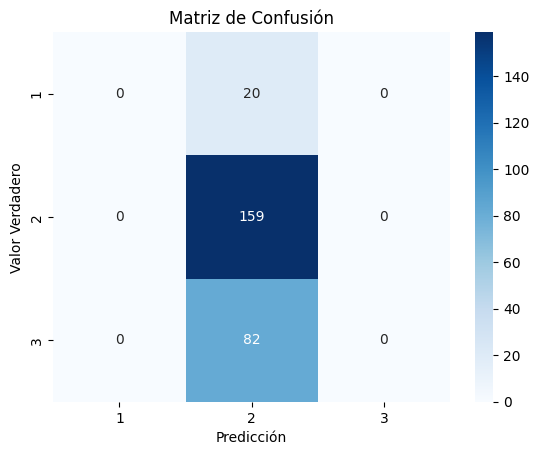

In [41]:
cm = confusion_matrix(y_test_less, predic_s)

# Crear la visualización gráfica de la matriz de confusión utilizando Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

In [42]:
# predecimos con el mejor conjunto de hiperparámetros
y_pred_s = svc_regres.best_estimator_.predict(dftest)

Descargamos el csv que vamos a utilizar para testear nuestra predicción en la competición

In [43]:
url4 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/submission_format.csv'
dfsubmission = pd.read_csv(url4)
dfsubmission['damage_grade'] = y_pred_s

# Obtener la ruta completa a la carpeta de descargas del usuario
desktop_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# Pasar el dataframe a csv y guardar el archivo en la carpeta de descargas
dfsubmission.to_csv(os.path.join(desktop_path, 'submission_SVC.csv'), index=False)

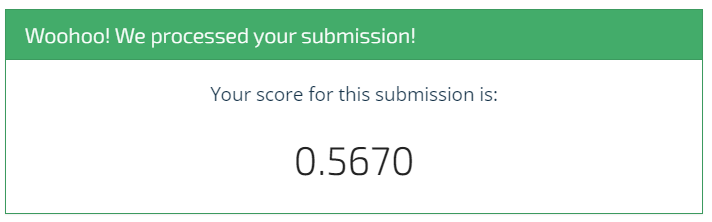

### LazyPredict

Ahora vamos a utilizar un modelo muy útil que se llama LazyPredict, este lo que hace es construir una gran cantidad de modelos basicos sin mucho código y nos ayuda a entender cual de todos esos modelos es el mejor si ningún parametro.

In [44]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_less, X_test_less, y_train_less, y_test_less)
models

100%|██████████| 29/29 [00:04<00:00,  6.90it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.38,0.60,None,0.25,0.03
GaussianNB,0.37,0.58,None,0.25,0.02
BaggingClassifier,0.64,0.56,None,0.64,0.12
BernoulliNB,0.55,0.51,None,0.54,0.02
NearestCentroid,0.39,0.50,None,0.37,0.02
LinearDiscriminantAnalysis,0.58,0.49,None,0.53,0.03
SGDClassifier,0.57,0.47,None,0.56,0.04
LinearSVC,0.61,0.46,None,0.55,0.26
LogisticRegression,0.60,0.46,None,0.55,0.05


Como podemos ver el modelo que más Acurracy da es el de BaggingClassifier y RandomForestClassifier pero en este caso no nos vamos a fijar en ese resultado si no que nos fijaremos en el F1_score, da la casualidad que en ambas puntuaciones es el que mayor puntuación dá es BaggingClassifier.

### BaggingClassifier

In [45]:
param = {
    'estimator': [RandomForestClassifier()],
    'n_estimators': [2, 5, 7, 10, 12],
    'max_samples': [0.2, 0.5],
    #'max_features': [0.5, 0.7],
    #'bootstrap': [True, False],
    #'bootstrap_features': [True, False]
}

In [46]:
# Create a BaggingClassifier object
bagging = BaggingClassifier()

# Create a RandomizedSearchCV object to tune the hyperparameters
bagg_random = RandomizedSearchCV(bagging, param, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
bagg_random.fit(X_train, y_train)

# Print the best hyperparameters
print(bagg_random.best_params_)

{'n_estimators': 12, 'max_samples': 0.5, 'estimator': RandomForestClassifier()}


In [47]:
# realizaremos una predición con el mejor modelo obtenido anteriormente
pred = bagg_random.best_estimator_.predict(X_test)

#Evaluaremos el modelo usando el f1_score
score_f1 = f1_score(y_test,pred, average = 'micro', labels=[1,2,3])

# imprimir F1-Score y precisión 
print(f'Los mejores parametros para predecir son:{bagg_random.best_estimator_}\nF1_score --> {score_f1}')

Los mejores parametros para predecir son:BaggingClassifier(estimator=RandomForestClassifier(), max_samples=0.5,
                  n_estimators=12)
F1_score --> 0.7111008787076475


Matríz de Confusión

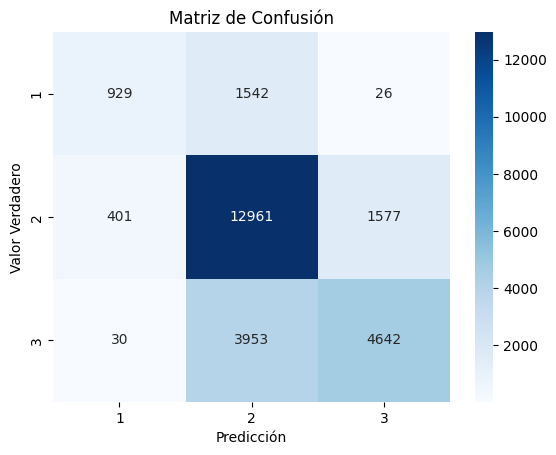

In [48]:
cm = confusion_matrix(y_test, pred)

# Crear la visualización gráfica de la matriz de confusión utilizando Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

In [49]:
# predecimos con el mejor conjunto de hiperparámetros
y_pre = bagg_random.best_estimator_.predict(dftest)

Descargamos el csv que vamos a utilizar para testear nuestra predicción en la competición

In [ ]:
url4 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/submission_format.csv'
dfsubmission = pd.read_csv(url4)
dfsubmission['damage_grade'] = y_pre

# Obtener la ruta completa a la carpeta de descargas del usuario
desktop_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# Pasar el dataframe a csv y guardar el archivo en la carpeta de descargas
dfsubmission.to_csv(os.path.join(desktop_path, 'submission_BC.csv'), index=False)

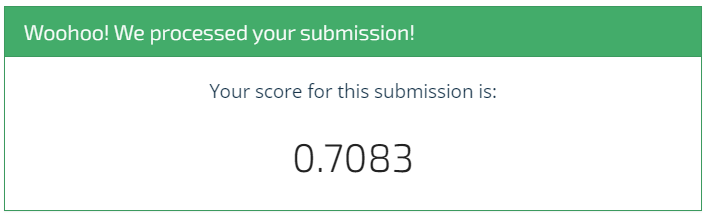